# Convolutional Neural Networks with Keras

In [1]:
## Import Keras and Packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

from keras.layers import Conv2D # to add convolutional layers
from keras.layers import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## DATA

In [2]:
# Import data
from keras.datasets import mnist

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [3]:
# Normalize the pixel values to be between 0 and 1

X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

In [4]:
# Convert the target variable into binary categories

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

## Convolutional Neural Network with One Set of Convolutional and Pooling Layers

In [5]:
# A function to create our model

def convolutional_model():

    # create model
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [6]:
# Create the model, train it and evaluate it.

# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scoresA = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scoresA[1], 100-scoresA[1]*100))

Epoch 1/10
300/300 - 13s - 44ms/step - accuracy: 0.9230 - loss: 0.2837 - val_accuracy: 0.9673 - val_loss: 0.1051
Epoch 2/10
300/300 - 20s - 67ms/step - accuracy: 0.9746 - loss: 0.0875 - val_accuracy: 0.9791 - val_loss: 0.0665
Epoch 3/10
300/300 - 12s - 40ms/step - accuracy: 0.9822 - loss: 0.0606 - val_accuracy: 0.9828 - val_loss: 0.0539
Epoch 4/10
300/300 - 12s - 41ms/step - accuracy: 0.9860 - loss: 0.0464 - val_accuracy: 0.9834 - val_loss: 0.0503
Epoch 5/10
300/300 - 12s - 40ms/step - accuracy: 0.9887 - loss: 0.0373 - val_accuracy: 0.9848 - val_loss: 0.0465
Epoch 6/10
300/300 - 12s - 40ms/step - accuracy: 0.9901 - loss: 0.0321 - val_accuracy: 0.9861 - val_loss: 0.0441
Epoch 7/10
300/300 - 13s - 43ms/step - accuracy: 0.9919 - loss: 0.0259 - val_accuracy: 0.9864 - val_loss: 0.0405
Epoch 8/10
300/300 - 19s - 65ms/step - accuracy: 0.9933 - loss: 0.0217 - val_accuracy: 0.9859 - val_loss: 0.0435
Epoch 9/10
300/300 - 12s - 40ms/step - accuracy: 0.9945 - loss: 0.0177 - val_accuracy: 0.9875 - 

## Convolutional Neural Network with Two Sets of Convolutional and Pooling Layers

In [7]:
def convolutional_model():

    # create model
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [8]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scoresB = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scoresB[1], 100-scoresB[1]*100))

Epoch 1/10
300/300 - 14s - 47ms/step - accuracy: 0.8644 - loss: 0.4683 - val_accuracy: 0.9596 - val_loss: 0.1310
Epoch 2/10
300/300 - 14s - 47ms/step - accuracy: 0.9648 - loss: 0.1150 - val_accuracy: 0.9729 - val_loss: 0.0809
Epoch 3/10
300/300 - 19s - 63ms/step - accuracy: 0.9747 - loss: 0.0821 - val_accuracy: 0.9783 - val_loss: 0.0697
Epoch 4/10
300/300 - 20s - 68ms/step - accuracy: 0.9797 - loss: 0.0665 - val_accuracy: 0.9801 - val_loss: 0.0604
Epoch 5/10
300/300 - 21s - 69ms/step - accuracy: 0.9832 - loss: 0.0558 - val_accuracy: 0.9831 - val_loss: 0.0492
Epoch 6/10
300/300 - 12s - 41ms/step - accuracy: 0.9852 - loss: 0.0491 - val_accuracy: 0.9841 - val_loss: 0.0534
Epoch 7/10
300/300 - 12s - 41ms/step - accuracy: 0.9866 - loss: 0.0439 - val_accuracy: 0.9851 - val_loss: 0.0463
Epoch 8/10
300/300 - 21s - 69ms/step - accuracy: 0.9871 - loss: 0.0403 - val_accuracy: 0.9870 - val_loss: 0.0389
Epoch 9/10
300/300 - 12s - 41ms/step - accuracy: 0.9886 - loss: 0.0373 - val_accuracy: 0.9855 - 

In [9]:
# Changing batch size

# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=2)

# evaluate the model
scoresC = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scoresC[1], 100-scoresC[1]*100))

Epoch 1/10
59/59 - 14s - 237ms/step - accuracy: 0.6432 - loss: 1.3537 - val_accuracy: 0.8734 - val_loss: 0.4563
Epoch 2/10
59/59 - 20s - 343ms/step - accuracy: 0.8998 - loss: 0.3464 - val_accuracy: 0.9291 - val_loss: 0.2533
Epoch 3/10
59/59 - 12s - 211ms/step - accuracy: 0.9361 - loss: 0.2214 - val_accuracy: 0.9512 - val_loss: 0.1716
Epoch 4/10
59/59 - 21s - 348ms/step - accuracy: 0.9510 - loss: 0.1662 - val_accuracy: 0.9593 - val_loss: 0.1380
Epoch 5/10
59/59 - 20s - 346ms/step - accuracy: 0.9609 - loss: 0.1341 - val_accuracy: 0.9646 - val_loss: 0.1217
Epoch 6/10
59/59 - 21s - 348ms/step - accuracy: 0.9661 - loss: 0.1149 - val_accuracy: 0.9699 - val_loss: 0.0983
Epoch 7/10
59/59 - 20s - 346ms/step - accuracy: 0.9698 - loss: 0.1008 - val_accuracy: 0.9733 - val_loss: 0.0870
Epoch 8/10
59/59 - 20s - 347ms/step - accuracy: 0.9733 - loss: 0.0897 - val_accuracy: 0.9758 - val_loss: 0.0770
Epoch 9/10
59/59 - 12s - 211ms/step - accuracy: 0.9754 - loss: 0.0808 - val_accuracy: 0.9778 - val_loss:

In [10]:
# Changing number of epochs

# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=1024, verbose=2)

# evaluate the model
scoresD = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scoresD[1], 100-scoresD[1]*100))

Epoch 1/25
59/59 - 14s - 234ms/step - accuracy: 0.6722 - loss: 1.2355 - val_accuracy: 0.9019 - val_loss: 0.3535
Epoch 2/25
59/59 - 20s - 338ms/step - accuracy: 0.9244 - loss: 0.2627 - val_accuracy: 0.9464 - val_loss: 0.1797
Epoch 3/25
59/59 - 20s - 346ms/step - accuracy: 0.9512 - loss: 0.1690 - val_accuracy: 0.9602 - val_loss: 0.1306
Epoch 4/25
59/59 - 21s - 348ms/step - accuracy: 0.9611 - loss: 0.1310 - val_accuracy: 0.9703 - val_loss: 0.1024
Epoch 5/25
59/59 - 24s - 398ms/step - accuracy: 0.9678 - loss: 0.1082 - val_accuracy: 0.9744 - val_loss: 0.0854
Epoch 6/25
59/59 - 18s - 308ms/step - accuracy: 0.9722 - loss: 0.0936 - val_accuracy: 0.9776 - val_loss: 0.0739
Epoch 7/25
59/59 - 12s - 208ms/step - accuracy: 0.9749 - loss: 0.0829 - val_accuracy: 0.9792 - val_loss: 0.0684
Epoch 8/25
59/59 - 21s - 352ms/step - accuracy: 0.9781 - loss: 0.0742 - val_accuracy: 0.9808 - val_loss: 0.0610
Epoch 9/25
59/59 - 20s - 342ms/step - accuracy: 0.9803 - loss: 0.0673 - val_accuracy: 0.9815 - val_loss:

          Model  Accuracy  Error (%)
0       CNN 1-1    0.9876   1.239997
1       CNN 2-2    0.9854   1.459998
2    CNN 2-2 +b    0.9770   2.300000
3  CNN 2-2 +b+e    0.9875   1.249999


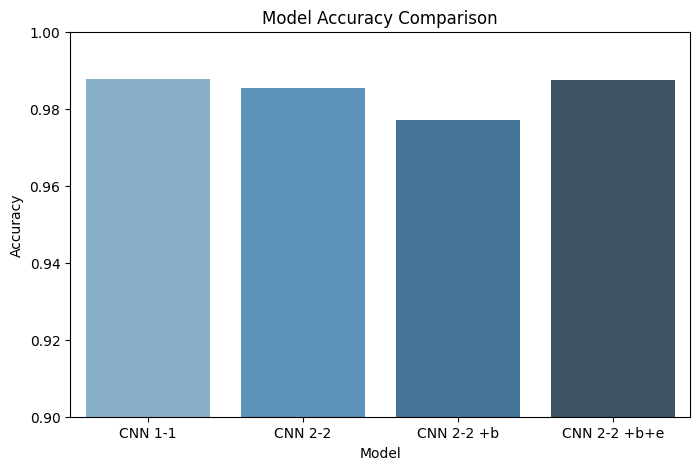

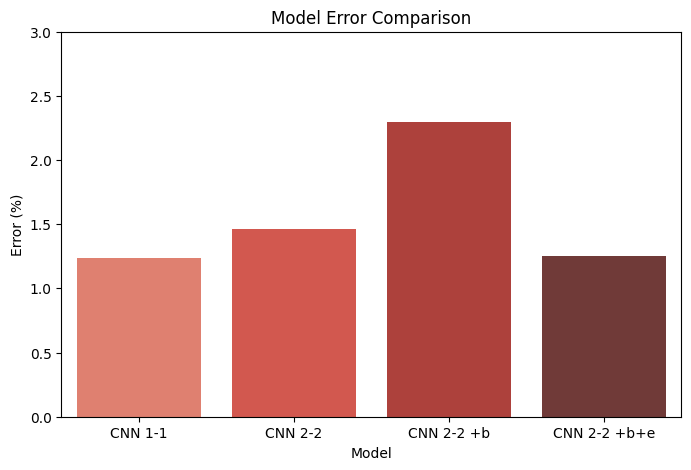

In [23]:
# Create DataFrame
data = {
    'Model': ['CNN 1-1', 'CNN 2-2', 'CNN 2-2 +b', 'CNN 2-2 +b+e'],
    'Accuracy': [scoresA[1], scoresB[1], scoresC[1], scoresD[1]]
}
df = pd.DataFrame(data)
df['Error (%)'] = 100 - df['Accuracy'] * 100

# Show table
print(df)

# Plot accuracy
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Model', y='Accuracy', hue='Model', palette='Blues_d', legend=False)
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1)
plt.ylabel('Accuracy')
plt.show()

# Plot error
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Model', y='Error (%)', hue='Model', palette='Reds_d', legend=False)
plt.title('Model Error Comparison')
plt.ylim(0, 3)
plt.ylabel('Error (%)')
plt.show()